# Exemplo de "Bag of Visual Words"

Vocês estão recebendo este código do professor e devem dar o crédito devido, para que não se caracterize a situação de tentar passar esforço dos outros como sendo seu (a.k.a. plágio). Divirtam-se!

In [1]:
!pip install opencv-contrib-python
import cv2
import os
import os.path
import numpy as np
import math
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(0)


DATA_DIR = 'Assets//Data_Filtered_Resized'
CATEGORY_LIST = ['Alakazam', 'Aerodactyl']   #os.listdir(DATA_DIR)
NUM_IMAGES_TRAIN_PER_CATEGORY = 60
NUM_IMAGES_TEST_PER_CATEGORY = 20
NUM_CLUSTERS = 25

def get_images_from_category(category, num_train, num_test, data_dir):
    category_dir = os.path.join(DATA_DIR, category)
    num_total = num_train + num_test
    filenames_train = []
    filenames_test = []
    
    for k, filename in enumerate(os.listdir(category_dir)):
        if k < num_train:
            filenames_train.append(os.path.join(category_dir, filename))
        elif k < num_total:
            filenames_test.append(os.path.join(category_dir, filename))
        else:
            break
    return filenames_train, filenames_test

def get_images_from_category_list(category_list, num_train, num_test, data_dir):
    filenames_train_all = []
    target_train = []
    filenames_test_all = []
    target_test = []
    for category in category_list:
        filenames_train, filenames_test = get_images_from_category(category, num_train, num_test, data_dir)
        filenames_train_all.extend(filenames_train)
        target_train.extend([category] * NUM_IMAGES_TRAIN_PER_CATEGORY)
        filenames_test_all.extend(filenames_test)
        target_test.extend([category] * NUM_IMAGES_TEST_PER_CATEGORY)
    return filenames_train_all, filenames_test_all, target_train, target_test

def cria_vocabulario(imagens, num_clusters):
    km = cv2.BOWKMeansTrainer(num_clusters)
    akaze = cv2.KAZE_create()
    for p in imagens:
        img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
        mask = np.ones(img.shape)
        kp, desc = akaze.detectAndCompute(img, mask)
        km.add(desc)
    return km.cluster()

def representa(vocab, img):
    kaze = cv2.KAZE_create()
    kp = kaze.detect(img)
    bowdesc = cv2.BOWImgDescriptorExtractor(kaze, cv2.FlannBasedMatcher())
    bowdesc.setVocabulary(vocab)
    return bowdesc.compute(img, kp)

def transforma_imagens(imagens, vocab):
    X = []
    for p in imagens:
        img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
        X.append(representa(vocab, img).flatten())
    return np.array(X)

imagens_train, imagens_test, target_train, target_test = get_images_from_category_list(CATEGORY_LIST, 
                                                                                        NUM_IMAGES_TRAIN_PER_CATEGORY, 
                                                                                        NUM_IMAGES_TEST_PER_CATEGORY, 
                                                                                        DATA_DIR)
vocab = cria_vocabulario(imagens_train, NUM_CLUSTERS)
X_train = transforma_imagens(imagens_train, vocab)
X_test = transforma_imagens(imagens_test, vocab)
y_train = target_train
y_test = target_test

# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators = 100)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(X_train, y_train)
scr = clf.score(X_test, y_test)

array([[0.        , 0.        , 0.        , 0.025     , 0.        ,
        0.01666667, 0.075     , 0.18333334, 0.00833333, 0.04166667,
        0.        , 0.03333334, 0.        , 0.075     , 0.10000001,
        0.04166667, 0.01666667, 0.09166667, 0.125     , 0.01666667,
        0.        , 0.10000001, 0.00833333, 0.03333334, 0.00833333]],
      dtype=float32)

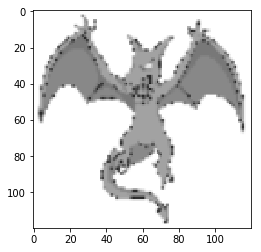

In [2]:
def show_example(path = "Testes/Testes/9.png", Plot = True):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, dsize=(120, 120))
    if Plot:
        plt.imshow(img_resized, cmap='gray', vmin=0, vmax=255)
    return representa(vocab, img_resized)

show_example()

## Análise Exploratória:

## Para realizar a análise exploratória seguiremos alguns passos:

# Passo 1:
## Extrair histograma:
### O código abaixo Extrai histograma de frequências relativas de features de todas as imagens do Dataset escolhido. (Pokemons)

In [3]:
origin_dir = 'Assets//Data_Filtered_Resized'
Hist_Dict = {}
for pkmn in os.listdir(origin_dir):
    Hist_Dict[pkmn] = []
    current_dir = os.path.join(origin_dir,pkmn)
    for k, img in enumerate(os.listdir(current_dir)):
        Hist_Dict[pkmn].append(show_example(os.path.join(current_dir,img), Plot = False))
print(Hist_Dict['Alakazam'])

[array([[0.        , 0.        , 0.        , 0.05590062, 0.        ,
        0.00621118, 0.        , 0.0621118 , 0.        , 0.        ,
        0.        , 0.19875777, 0.        , 0.        , 0.22360249,
        0.3167702 , 0.01863354, 0.00621118, 0.01242236, 0.05590062,
        0.        , 0.00621118, 0.01863354, 0.01242236, 0.00621118]],
      dtype=float32), array([[0.        , 0.        , 0.01463415, 0.08292683, 0.02926829,
        0.03414634, 0.13170731, 0.01463415, 0.        , 0.05853659,
        0.01463415, 0.06341463, 0.        , 0.02439024, 0.07317073,
        0.24390244, 0.07317073, 0.        , 0.0195122 , 0.02439024,
        0.0195122 , 0.03414634, 0.0097561 , 0.00487805, 0.02926829]],
      dtype=float32), array([[0.        , 0.        , 0.02475248, 0.0990099 , 0.03960396,
        0.04950495, 0.13366337, 0.00990099, 0.        , 0.06930693,
        0.00990099, 0.04950495, 0.        , 0.01980198, 0.06435643,
        0.2029703 , 0.07920792, 0.        , 0.01980198, 0.02970297,

# Passo 2:
## Criar um DataFrame para trabalhar melhor com o DataSet:
### Foi necessário criar um dataframe dedicado a cada pokemon com suas respectivas frequências relativas. Visando melhorar e facilitar a análise permitindo cruzar e manusear os dados com maior facilidade.

In [4]:
lista = []
lista_nomes = os.listdir('Assets/Data_Filtered_Resized')
for k in Hist_Dict:
    x = pd.Series(Hist_Dict[k]).mean()
    x = pd.Series(x[0])
    lista.append(x)
df_medias = pd.DataFrame(lista, index = lista_nomes)

## Tabela das frequências relativas médias de cada feature por pokémon:

In [5]:
df_medias.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Aerodactyl,0.009468,0.013481,0.010997,0.053186,0.019937,0.017927,0.046878,0.049086,0.051650,0.050819,...,0.056652,0.011645,0.034857,0.053842,0.059962,0.066665,0.041035,0.056522,0.008588,0.013866
Alakazam,0.009691,0.008989,0.009893,0.079516,0.017666,0.026003,0.032137,0.061954,0.024155,0.042625,...,0.093489,0.012339,0.059147,0.069984,0.041683,0.045470,0.029808,0.022209,0.007783,0.017046
Arbok,0.014958,0.015682,0.021726,0.045629,0.020538,0.029188,0.099943,0.051523,0.013983,0.031629,...,0.079213,0.037193,0.053044,0.043310,0.032429,0.069554,0.092515,0.016768,0.024936,0.022264
Arcanine,0.010312,0.009672,0.007333,0.056760,0.007638,0.022549,0.064319,0.064084,0.013857,0.023405,...,0.069205,0.015549,0.079544,0.085693,0.022858,0.049202,0.065982,0.008622,0.012220,0.007214
Beedrill,0.011973,0.008866,0.005628,0.079848,0.013292,0.026272,0.039813,0.059488,0.031501,0.031798,...,0.072030,0.007808,0.062130,0.084932,0.028924,0.063748,0.052231,0.028513,0.006320,0.012424


# Passo 3:
## Calculando o valor médio dos dados:
### Nesta etapa foi necessário tirar o valor médio dos dados. Para assim aproxima-los do ponto (0,0), origem do sistema. Dessa forma permitindo a distinção evidente etre cada um deles.

In [11]:
df_medias = df_medias - (1/25) 

In [7]:
df_medias.sum(axis=1)

Aerodactyl   -5.401671e-08
Alakazam      5.587935e-09
Arbok        -2.048910e-08
Arcanine      6.705523e-08
Beedrill      4.097819e-08
Bellsprout    7.264316e-08
Bulbasaur     1.117587e-08
Charmander    7.078052e-08
Jigglypuff    2.980232e-08
Meowth        6.332994e-08
Mew           2.235174e-08
Pidgey        8.195639e-08
Pikachu       9.313226e-08
Squirtle      6.705523e-08
Voltorb       5.029142e-08
dtype: float32

In [8]:
normas = (df_medias*df_medias).sum(axis=1)
for m in normas.index:
    df_medias.loc[m] = df_medias.loc[m]/np.sqrt(normas[m])

In [9]:
df_medias.dot(df_medias.transpose())
print("Tabela que mostra o quanto os pokémons são semelhantes entre si, diagonal principal é 1, pois todo pokémon é idêntico a si mesmo.")

Tabela que mostra o quanto os pokémons são semelhantes entre si, diagonal principal é 1, pois todo pokémon é idêntico a si mesmo.


In [10]:
monstros = []
for feat in range(25):
    monstros.append(sorted(df_medias.nlargest(n=5, columns=[feat]).index) + [feat])
x = sorted(monstros)
print(x, "Aqui, podemos observar que alguns pokémons tem semelhanças muito fortes entre si, pois apresentam as mesmas features em abundância (na média).")

[['Aerodactyl', 'Alakazam', 'Beedrill', 'Bulbasaur', 'Meowth', 3], ['Aerodactyl', 'Alakazam', 'Beedrill', 'Mew', 'Voltorb', 22], ['Aerodactyl', 'Alakazam', 'Bulbasaur', 'Charmander', 'Meowth', 9], ['Aerodactyl', 'Alakazam', 'Charmander', 'Meowth', 'Voltorb', 12], ['Aerodactyl', 'Alakazam', 'Charmander', 'Mew', 'Voltorb', 19], ['Aerodactyl', 'Beedrill', 'Mew', 'Pidgey', 'Voltorb', 8], ['Aerodactyl', 'Bulbasaur', 'Charmander', 'Mew', 'Voltorb', 20], ['Aerodactyl', 'Charmander', 'Mew', 'Pidgey', 'Voltorb', 10], ['Alakazam', 'Arbok', 'Beedrill', 'Jigglypuff', 'Meowth', 15], ['Alakazam', 'Arbok', 'Bellsprout', 'Jigglypuff', 'Voltorb', 24], ['Alakazam', 'Arcanine', 'Beedrill', 'Bellsprout', 'Meowth', 14], ['Alakazam', 'Arcanine', 'Bellsprout', 'Mew', 'Pikachu', 11], ['Alakazam', 'Bellsprout', 'Charmander', 'Meowth', 'Pikachu', 7], ['Arbok', 'Arcanine', 'Bellsprout', 'Bulbasaur', 'Voltorb', 23], ['Arbok', 'Arcanine', 'Bulbasaur', 'Jigglypuff', 'Voltorb', 0], ['Arbok', 'Arcanine', 'Bulbasaur',

## Bibliografia:
- Modelo Bag of Visual Words, e parte da análise exploratória produzidos por/com assistência de Fábio Ayres.
- Dataset: [Pokémon Gen One](https://www.kaggle.com/thedagger/pokemon-generation-one/data) da plataforma Kaggle.com
